In [1]:
# Load in Hub library functions
%run hublib.py
#display(Javascript("run_until_wait()"))

<html>
<body>
    <h2> Rosenbrock Function UQ Test</h2>
    <p>  The Rosenbrock function is commonly used for testing optimization and uncertainty quantification software.  The form we will use is</p>
    <p>
    $f(x,y) = 100*(y-x^2)^2 + (1-x)^2$
    <p>
    This is a fourth order polynomial and its response surface looks like this:
    <p>
    <img src="rosen_level_4.jpeg" width=400 align="float"/>
    <p>
    UQ software should be able to build close approximations to this response surface given enough sample points.  Our "Smolyak GPC" method will reproduce
    this response exactly with a level 4 run.
</body>
</html>


In [2]:
v1 = UQVar('x', 'x', 'Uniform', -2, 2)
v2 = UQVar('y', 'y', 'Uniform', -2, 2)
level = IntSlider(description='GPC Level', value=4, min=1, max=20)
display(v1.form, v2.form, level)

In [3]:
%wait Run,Running

In [4]:
cmd = './rosen_prog.py --x=$x --y=$y'
u = UQRun('GPC', level.value, cmd, [v1.value, v2.value])

Saving run to foo.hdf5

Processing <HDF5 dataset "z": shape (65,), type "<f8">
	Surface   = 100.000000001004*x**4 - 6.99440505513849e-14*x**3*y - 4.9737991503207e-13*x**3 - 2.83304473630564e-9*x**2*y**2 - 199.999999999162*x**2*y + 1.0000000006651*x**2 - 2.33146835171283e-14*x*y**3 + 3.11750625314744e-12*x*y**2 + 1.99840144432528e-13*x*y - 2.00000000000322*x + 2.20512171023035e-9*y**4 - 1.90793769672126e-10*y**3 + 99.9999999940661*y**2 + 5.20742560183862e-10*y + 1.00000000231962
	RMSE      = 9.29e-09 (2.57e-10 %)

SENSITIVITY:
Var      u*            dev
-----------------------------
x    5.0835e+03    6.9637e+03
y    1.9661e+03    1.7441e+03


In [5]:
plottype = Dropdown(
            options=['Matplotlib', 'Plotly'],
            description='Choose which plot library to use.',
            value='Matplotlib')
display(plottype)

In [6]:
%wait Plot,Plotting

<IPython.core.display.Javascript object>


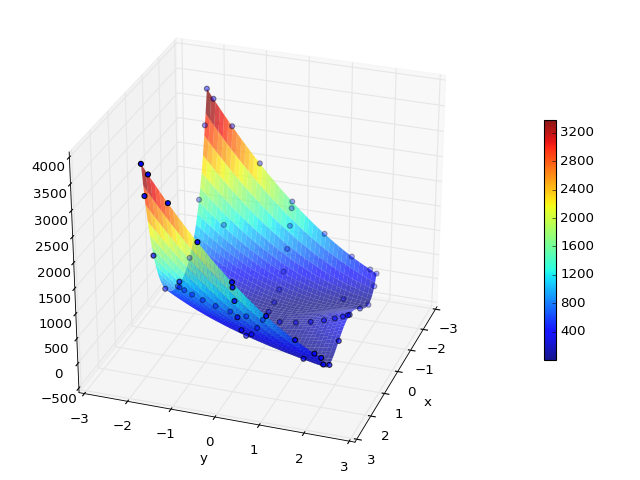

In [7]:
from IPython.display import clear_output
clear_output()
if plottype.value == 'Matplotlib':
    u.plot_responses()
else:
    display(u.plotly_responses())

<IPython.core.display.Javascript object>


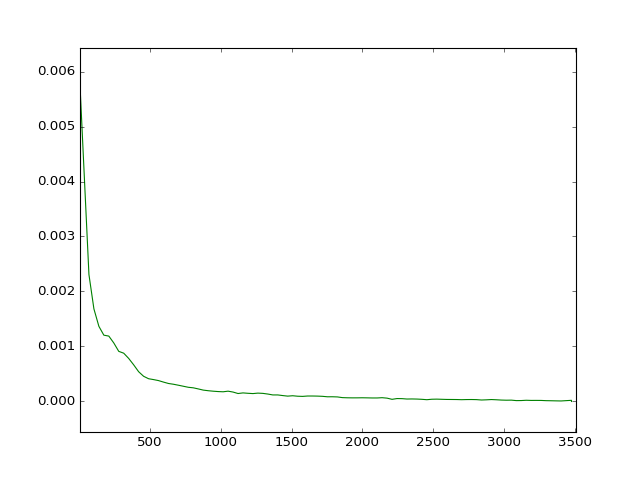

In [8]:
if plottype.value == 'Matplotlib':
    u.plot_pdfs()
else:
    display(u.plotly_pdfs())

In [9]:
%waitdone